## Dataset: Estimation of Obesity Levels Based On Eating Habits and Physical Condition

Este conjunto de datos contiene información sobre diversos hábitos alimenticios, características físicas y otros atributos relacionados con la salud de individuos, junto con una etiqueta de clasificación de obesidad.

Fuente: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

### Variables

| Variable                        | Tipo        | Naturaleza    | Descripción                                                   |
|--------------------------------|-------------|---------------|---------------------------------------------------------------|
| Gender                         | Feature     | Categórica    | Género                                                        |
| Age                            | Feature     | Continua      | Edad                                                          |
| Height                         | Feature     | Continua      | Altura                                                        |
| Weight                         | Feature     | Continua      | Peso                                                          |
| family_history_with_overweight | Feature     | Binaria       | ¿Tiene algún familiar que haya sufrido o sufra de sobrepeso? |
| FAVC                           | Feature     | Binaria       | ¿Come alimentos altos en calorías frecuentemente?             |
| FCVC                           | Feature     | Entera        | ¿Suele comer verduras en sus comidas?                         |
| NCP                            | Feature     | Continua      | ¿Cuántas comidas principales tiene diariamente?               |
| CAEC                           | Feature     | Ordinal       | ¿Come algún alimento entre comidas?                           |
| SMOKE                          | Feature     | Binaria       | ¿Fuma?                                                        |
| CH2O                           | Feature     | Continua      | ¿Cuánta agua bebe diariamente?                                |
| SCC                            | Feature     | Binaria       | ¿Controla las calorías que ingiere diariamente?               |
| FAF                            | Feature     | Continua      | ¿Con qué frecuencia realiza actividad física?                 |
| TUE                            | Feature     | Entera        | ¿Cuánto tiempo utiliza dispositivos tecnológicos?             |
| CALC                           | Feature     | Ordinal       | ¿Con qué frecuencia consume alcohol?                          |
| MTRANS                         | Feature     | Categórica    | ¿Qué medio de transporte utiliza habitualmente?               |
| NObeyesdad                     | Target      | Categórica    | Nivel de obesidad                                             |



### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Extraemos y cargamos los datos a un dataframe

In [2]:
df = pd.read_csv('DataEj2.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Vemos cuales son los valores de las variables categoricas
print(df.columns.tolist())
unique_values = df['CAEC'].unique()
print("CAEC values:", unique_values)
unique_values = df['CALC'].unique()
print("CALC values:", unique_values)
unique_values = df['MTRANS'].unique()
print("MTRANS values:", unique_values)
target_values = df['NObeyesdad'].unique()
print("NObeyesdad values:", target_values)


['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
CAEC values: ['Sometimes' 'Frequently' 'Always' 'no']
CALC values: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### Preprocesamiento de los datos

Esto implica el manejor de valores faltantes (que por suerte no tenemos). la codificación de variables categóricas, la normalización de los datos

In [4]:
# Codificación de las variables
from sklearn.preprocessing import OrdinalEncoder

df_copy = df.copy()

# Eliminamos la columna 'NObeyesdad' ya que es la variable objetivo
df_copy = df_copy.drop(columns=['NObeyesdad'])

# Variables ordinales
caec_and_calc_mapping = {'no': 0, 'Sometimes': 1.0, 'Frequently': 2.0, 'Always': 3.0}
df_copy['CAEC'] = df['CAEC'].map(caec_and_calc_mapping)
df_copy['CALC'] = df['CALC'].map(caec_and_calc_mapping)

# Variables categóricas
df_copy = pd.get_dummies(df_copy, columns=['MTRANS'], prefix='MTRANS', dtype=float )

# Variables binarias
ordinal_encoder = OrdinalEncoder()
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
df_copy[categorical_columns] = ordinal_encoder.fit_transform(df_copy[categorical_columns])

df_copy.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
ordinal_columns = ['CAEC', 'CALC']
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
df_copy[continuous_columns] = scaler.fit_transform(df_copy[continuous_columns])
df_copy.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,-0.522124,-0.875589,-0.862558,1.0,0.0,-0.785019,0.404153,1.0,0.0,-0.013073,0.0,-1.188039,0.561997,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,-0.522124,-1.947599,-1.168077,1.0,0.0,1.088342,0.404153,1.0,1.0,1.618759,1.0,2.339750,-1.080625,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,-0.206889,1.054029,-0.366090,1.0,0.0,-0.785019,0.404153,1.0,0.0,-0.013073,0.0,1.163820,0.561997,2.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.423582,1.054029,0.015808,0.0,0.0,1.088342,0.404153,1.0,0.0,-0.013073,0.0,1.163820,-1.080625,2.0,0.0,0.0,0.0,0.0,1.0
4,1.0,-0.364507,0.839627,0.122740,0.0,0.0,-0.785019,-2.167023,1.0,0.0,-0.013073,0.0,-1.188039,-1.080625,1.0,0.0,0.0,0.0,1.0,0.0


### Reducción de dimensionalidad

#### PCA

Varianza explicada por cada componente: [0.22648604 0.18657893 0.12645386 0.11886405 0.11757848 0.09672213
 0.08194625 0.04537026]


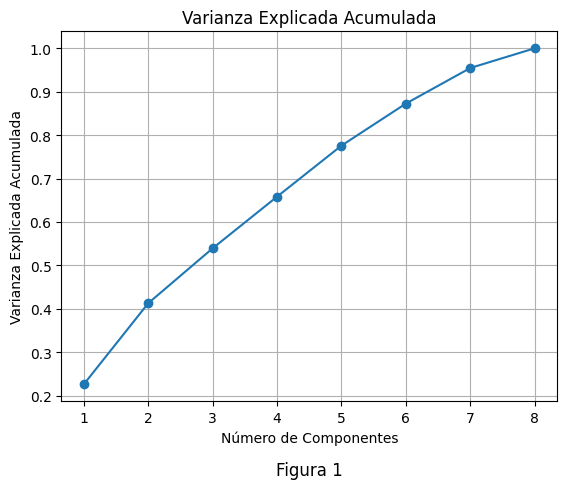

In [11]:
from sklearn.decomposition import PCA

df_continuous = df_copy[continuous_columns].copy()

pca = PCA(n_components=8)
principal_components = pca.fit_transform(df_continuous)
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, principal_components.shape[1] + 1)])

# Analisis de varianza
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance_ratio)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada')

# Agregamos etiqueta de figura
plt.text(0.5, -0.20, "Figura 1", size=12, ha="center", transform=plt.gca().transAxes)

plt.grid()
plt.show()


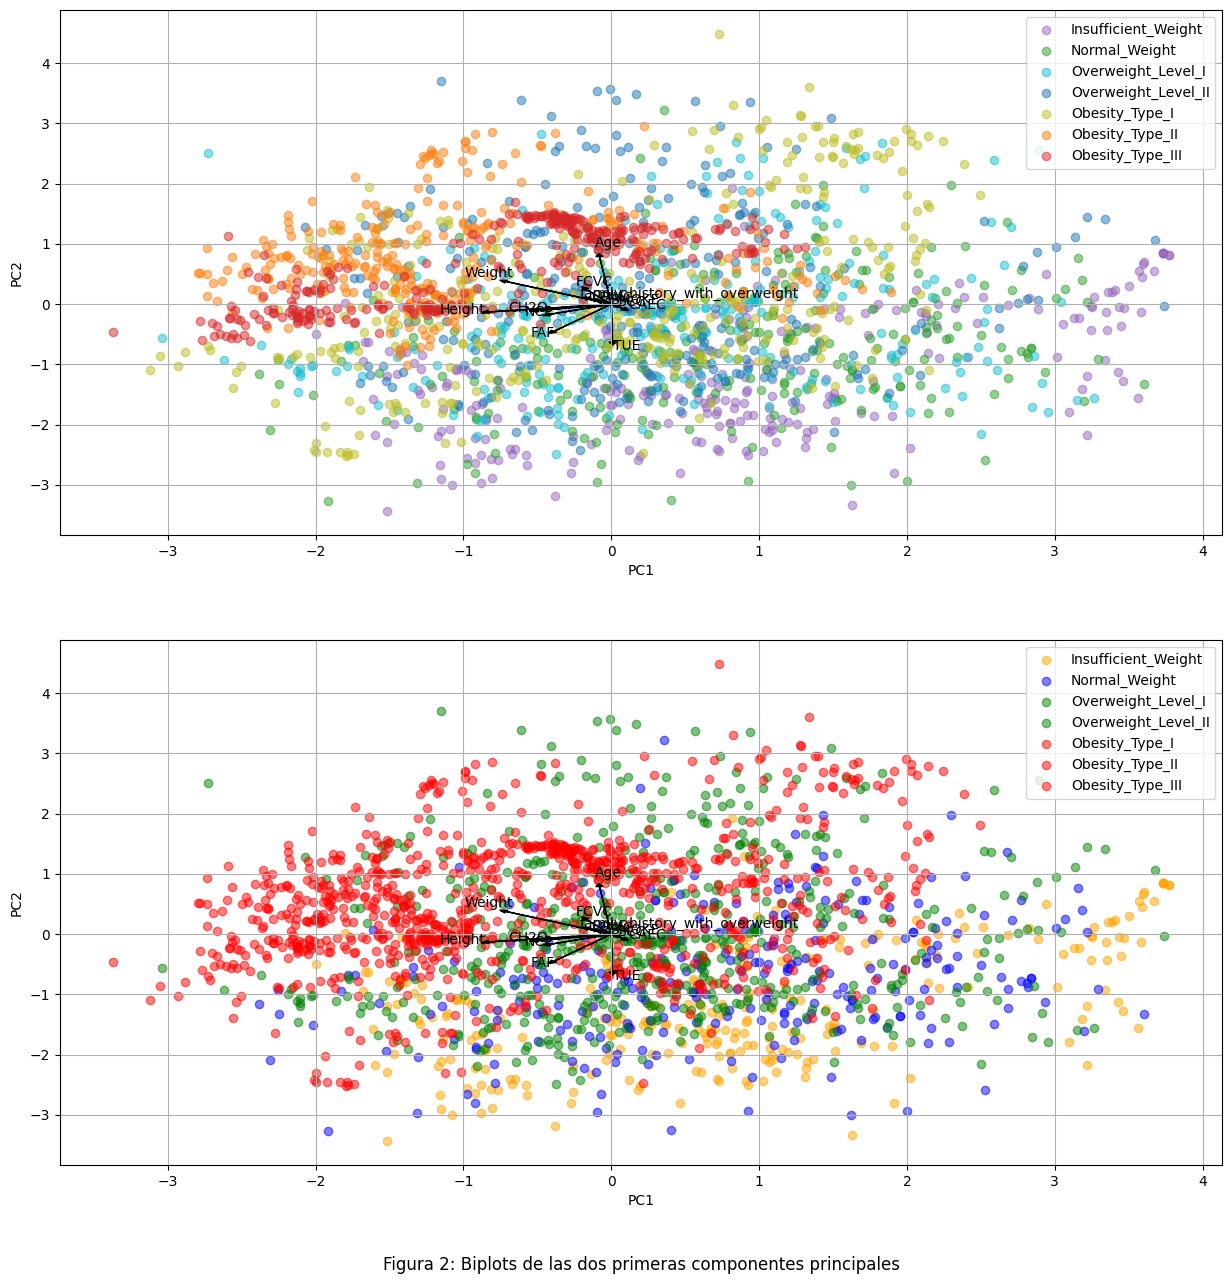

In [33]:
# Biplot para visualizar las componentes principales
components = list(df_copy.columns)
pca = PCA()
principal_components = pca.fit_transform(df_copy)

# Obtenemos las cargas de las componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Creamos un DataFrame con los resultados del PCA
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, principal_components.shape[1] + 1)])
principal_df['Obesity'] = df['NObeyesdad']

# Definimos los colores para cada categoría de 'Obesity'
obesity_colors_classes = {
    'Insufficient_Weight': 'orange',
    'Normal_Weight': 'blue',
    'Overweight_Level_I': 'green',
    'Overweight_Level_II': 'green',
    'Obesity_Type_I': 'red',
    'Obesity_Type_II': 'red',
    'Obesity_Type_III': 'red'
}

obesity_colors = {
    'Insufficient_Weight': '#9467bd',
    'Normal_Weight': '#2ca02c',
    'Overweight_Level_I': '#17becf',
    'Overweight_Level_II': '#1f77b4',
    'Obesity_Type_I': '#bcbd22',
    'Obesity_Type_II': '#ff7f0e',
    'Obesity_Type_III': '#d62728'
}

# Graficamos el biplot con el nombre de las componentes
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
color_palettes = [obesity_colors, obesity_colors_classes]

for i, paleta in enumerate(color_palettes):
    for category, color in paleta.items():
        subset = principal_df[principal_df['Obesity'] == category]
        ax[i].scatter(subset['PC1'], subset['PC2'], alpha=0.5, label=category, c=color)

    for j in range(1, len(principal_components[0]) - 5):
        ax[i].arrow(0, 0, loadings[j, 0], loadings[j, 1], head_width=0.05, head_length=0.05, fc='black', ec='black')
        ax[i].text(loadings[j, 0]*1.4, loadings[j, 1]*1.2, f'{components[j]}', color='black')

    ax[i].set_xlabel("PC1")
    ax[i].set_ylabel("PC2")
    ax[i].legend()
    ax[i].grid()

# Agregamos etiqueta de figura
plt.text(0.5, -0.20, "Figura 2: Biplots de las dos primeras componentes principales", size=12, ha="center", transform=plt.gca().transAxes)

plt.show()

#### t-SNE

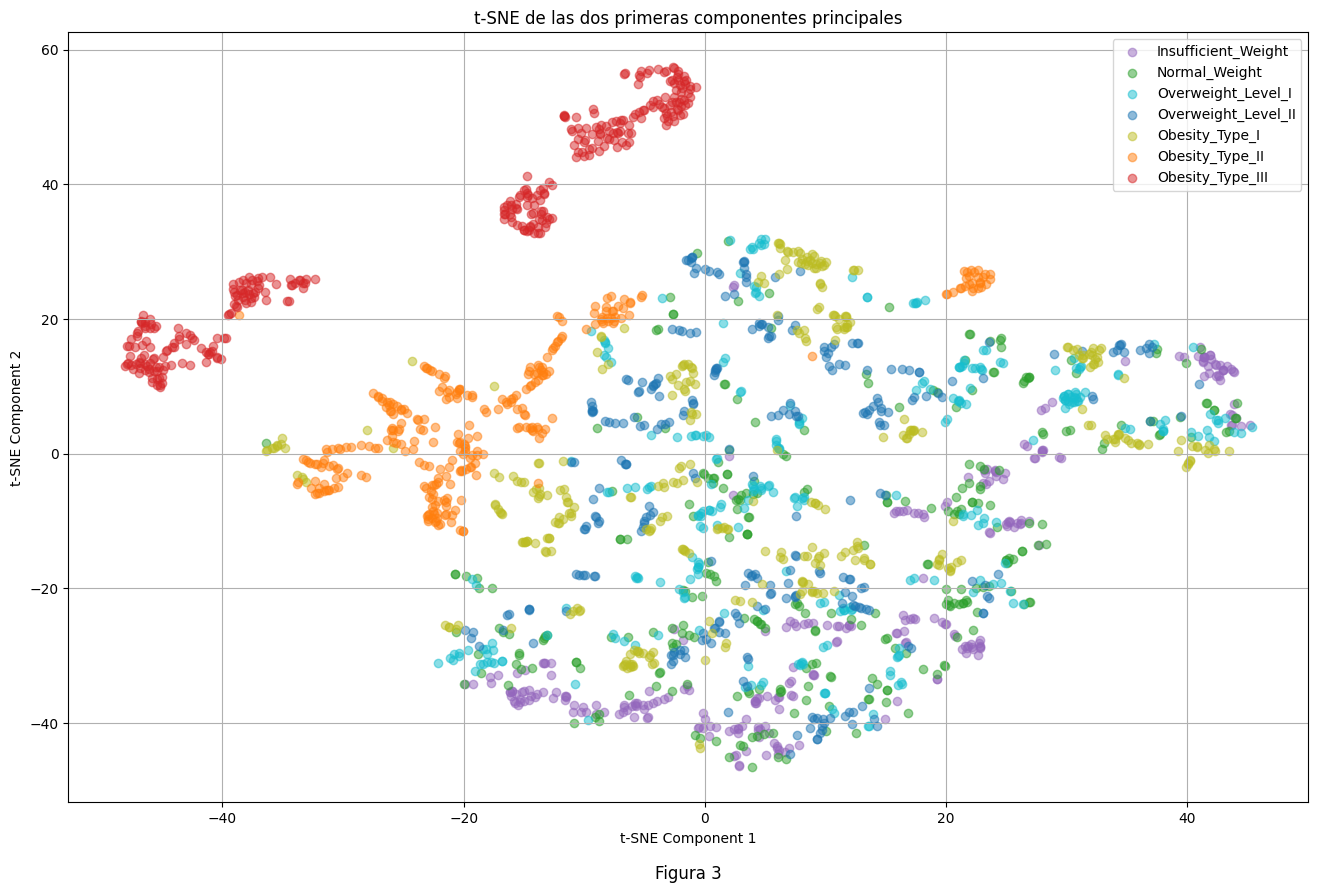

In [23]:
from sklearn.manifold import TSNE

df_continuous = df_copy[continuous_columns].copy()
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(df_continuous)

# Creamos un DataFrame con los resultados del t-SNE
df_tsne = pd.DataFrame(data=tsne_result, columns=[f't-SNE Component {i}' for i in range(1, tsne_result.shape[1] + 1)])
df_tsne['Obesity'] = df['NObeyesdad']

# Definimos los colores para cada categoría de 'Obesity'
colors = {
    'Insufficient_Weight': '#9467bd',
    'Normal_Weight': '#2ca02c',
    'Overweight_Level_I': '#17becf',
    'Overweight_Level_II': '#1f77b4',
    'Obesity_Type_I': '#bcbd22',
    'Obesity_Type_II': '#ff7f0e',
    'Obesity_Type_III': '#d62728'
}

# Graficamos el scatter
fig, ax = plt.subplots(figsize=(16, 10)) 

for category, color in colors.items():
    subset = df_tsne[df_tsne['Obesity'] == category]
    ax.scatter(subset['t-SNE Component 1'], subset['t-SNE Component 2'], alpha=0.5, label=category, c=color)

# Agregamos etiquetas a los ejes y título
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_title("t-SNE de las dos primeras componentes principales")
plt.legend()
plt.grid()

# Agregamos etiqueta de figura
plt.text(0.5, -0.10, "Figura 3", size=12, ha="center", transform=plt.gca().transAxes)

plt.show()

#### FAMD

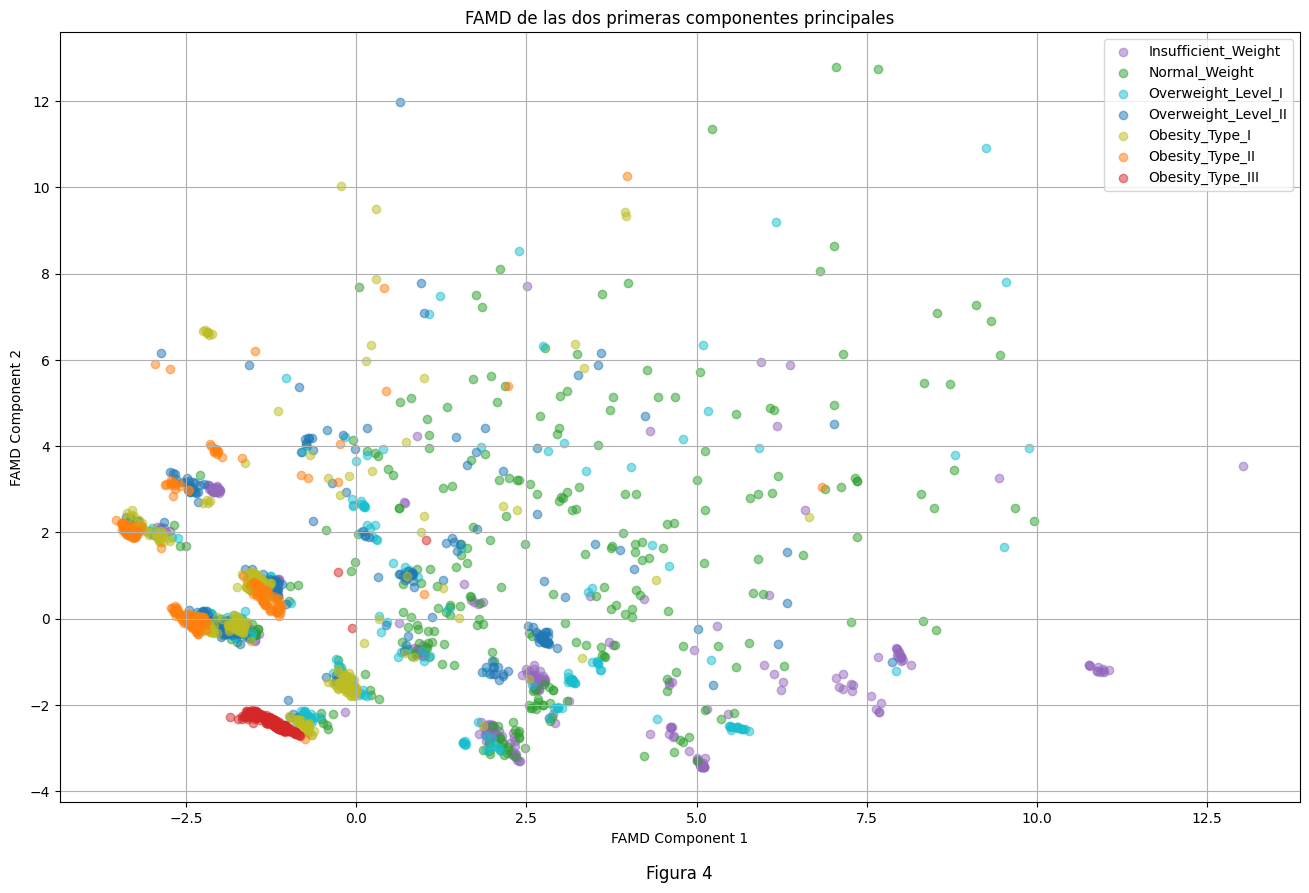

In [32]:
from prince import FAMD

df_famd = df.copy().drop(columns=['NObeyesdad'])
famd = FAMD(n_components=2, 
            n_iter=5,
            copy=True,
            check_input=True,
            random_state=42,
            engine="sklearn",
            handle_unknown="error")
famd.fit(df_famd)
df_famd = famd.row_coordinates(df_famd) # Creamos un DataFrame con los resultados del FAMD
df_famd.rename(columns={0: 'FAMD Component 1'}, inplace=True)
df_famd.rename(columns={1: 'FAMD Component 2'}, inplace=True)
df_famd['Obesity'] = df['NObeyesdad']
# df_famd.head()

# Definimos los colores para cada categoría de 'Obesity'
colors = {
    'Insufficient_Weight': '#9467bd',
    'Normal_Weight': '#2ca02c',
    'Overweight_Level_I': '#17becf',
    'Overweight_Level_II': '#1f77b4',
    'Obesity_Type_I': '#bcbd22',
    'Obesity_Type_II': '#ff7f0e',
    'Obesity_Type_III': '#d62728'
}

# Graficamos el scatter
fig, ax = plt.subplots(figsize=(16, 10))

for category, color in colors.items():
    subset = df_famd[df_famd['Obesity'] == category]
    ax.scatter(subset['FAMD Component 1'], subset['FAMD Component 2'], alpha=0.5, label=category, c=color)

# Agregamos etiquetas a los ejes y título
ax.set_xlabel("FAMD Component 1")
ax.set_ylabel("FAMD Component 2")
ax.set_title("FAMD de las dos primeras componentes principales")
plt.legend()
plt.grid()

# Agregamos etiqueta de figura
plt.text(0.5, -0.10, "Figura 4", size=12, ha="center", transform=plt.gca().transAxes)

plt.show()


### Conclusiones

Tras analizar el dataset y realizar la respectiva reducción de dimensionalidad, podemos llegar a varias conclusiones:

- Es un dataset complejo, con muchas variables, algunas de ellas categóricas, esto dificulta un poco el análisis. Sin embargo, gracias a esto vimos la importancia de, primero entender el conjunto de datos con el que trabajamos para poder realizar un preprocesamiento adecuado (eliminar valores nulos, codificar variables categóricas y normalizar los valores númericos).

- Ahora vamos a analizar un poco las diferentes técnicas de reducción de dimensionalidad aplicadas:

    - PCA: Por lejos una de las técnicas más comunes para reducir la dimensionalidad de los datos. Lamentablmente, debido a que los datos no eran linealmente separables, no se logró una buena separación de las clases. Sin embargo, más allá de esto pudimos arribar a ciertas conclusiones interesantes.
        - Primero, volviendo a lo mencionado anteoriormente, el dataset es complejo. Tiene 17 features y aplicando PCA, como podemos ver en le **Figura 1**, recien con 6 componentes principales logramos explicar el 80% de la varianza de los datos.
        - Segundo, graficando los datos en 2D (PC1 vs PC2), como se puede ver en la **Figura 2**, podemos notar que en el primer gráfico de la figura las clases no están claramente separadas si tomamos todas las etiquetas originales del dataset. Sin embargo, si _refactoreamos_ estas etiquetas de forma tal que tengamos solo 4 clases (Peso insuficiente, Peso normal, Sobrepeso y Obesidad Severa), como hicimos en el segundo gráfico de la figura, podemos ver que las clases están un poco más separadas. Esto nos da una idea de que, si bien PCA no es la mejor técnica para este dataset, si podemos llegar a ciertas conclusiones interesantes.
        - Por último, en la **Figura 2** además tener el scatter plot con las clases coloreadas, también tenemos graficados los vectores de las componentes principales que nos sirve para darnos una idea de que variables están relacionadas entre sí, podemos verlo más claro en la siguiente imagen:

        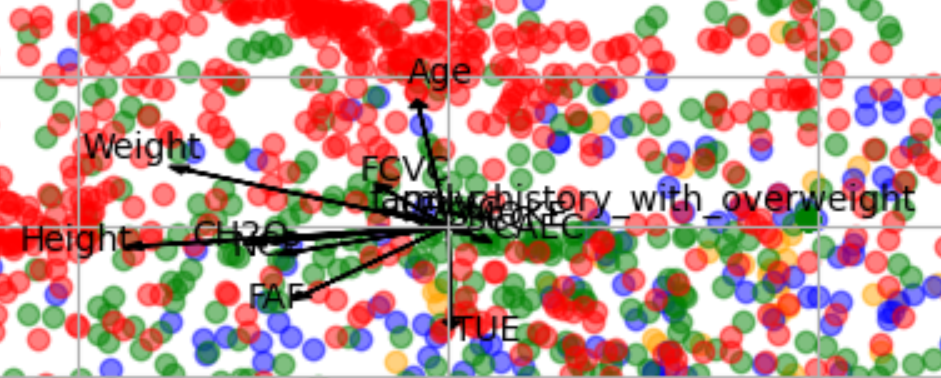

        Podemos ver, como es esperable que la variable del peso (Weigth) es la principal para determinar si el sujeto tiene sobrepeso u obesidad. Además, la edad (Age) es una variable relevante debido a que según el gráfico, a mayor edad los sujetos suelen tener un grado de obesidad más alto.
        También podemos notar una relacion entre las variables NCP (Número de comidas principales) y CH2O (Cantidad de agua que bebe diariamente), lo cual tiene sentido ya que si una persona come más veces al día, probablemente beba más agua.
                

    - t-SNE: Luego, aplicamos t-SNE, una técnica no lineal, y como podemos ver en la **Figura 3**, logramos una mejor separación de las clases, pero hasta cierto punto. Si bien t-SNE terminó siendo la mejor técnica para nuestro conjunto de datos debido a que los mismos no son linealmente separables, no logramos una separación perfecta de las clases. He probado con diferentes valores de perplexity y learning rate, pero el resultado terminaba siendo similar: las clases de *Obesity_Type_III* y *Obesity_Type_II* son correctamente agrupadas en el gráfico. Sin embargo, a medida que disminuye la obesidad, las clases se mezclan un poco más. Esto puede deberse a que las clases *Insufficient_Weight* y *Normal_Weight* son más difíciles de separar, ya que los datos de estas clases están más dispersos. En resumen, t-SNE logra una mejor separación de las clases que PCA, pero no es perfecta.
    
    - FAMD: Por último, aplicamos FAMD, una técnica que combina PCA y MCA, y como podemos ver en la **Figura 4**, logramos una buena separación de las clases. FAMD es una técnica muy útil para datasets con variables categóricas, como es nuestro caso. Sin embargo, quizás por un error de aplicación de mi parte, no logramos una buena separación de las clases. 

